In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d
import matplotlib.cm as cm



In [55]:
alpha=1
L=100
N=1000
dx=L/N
x=np.arange(-L/2,L/2,dx)
xtotal  = np.linspace(0,1,Nx+2)
x=xtotal[1:Nx+1]
ytotal  = np.linspace(0,1,Ny+2)
y=ytotal[1:Ny+1]

#Define Discrete WaveNumbers
kappa=2*np.pi*np.fft.fftfreq(N,d=dx)

#Initial Condition
u0=np.zeros_like(x)
u0[int((L/2 - L/10)/dx):int((L/2 + L/10)/dx)]=1
u0hat=np.fft.fft(u0)
u0hat_ri=np.concatenate((u0hat.real,u0hat.imag))
dt=0.1
t=np.arange(0,10,dt)

In [52]:
def rhsHeat(uhat_ri,t,kappa,alpha):
    uhat=uhat_ri[:N]+(1j)+uhat_ri[N:]
    d_uhat=-alpha**2*(np.power(kappa,2))*uhat
    d_uhat_ri=np.concatenate((d_uhat.real,d_uhat.imag)).astype('float64')
    return d_uhat_ri


In [53]:
uhat_ri=odeint(rhsHeat,u0hat_ri,t,args=(kappa,alpha))
uhat=uhat_ri[:,:N]+(1j)+uhat_ri[:,N:]
u=np.zeros_like(uhat)
for k in range(len(t)):
    u[k,:]=np.fft.ifft(uhat[k,:])
u=u.real

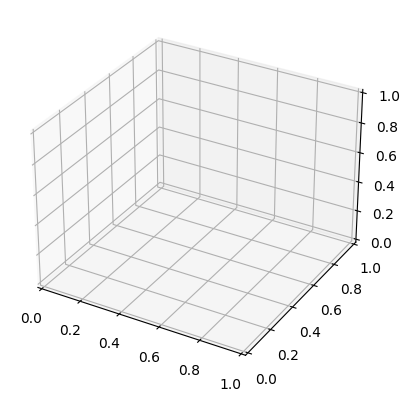

In [77]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
plt.set_cmap('jet_r')
u_plot=u[0:-1:10,1:]

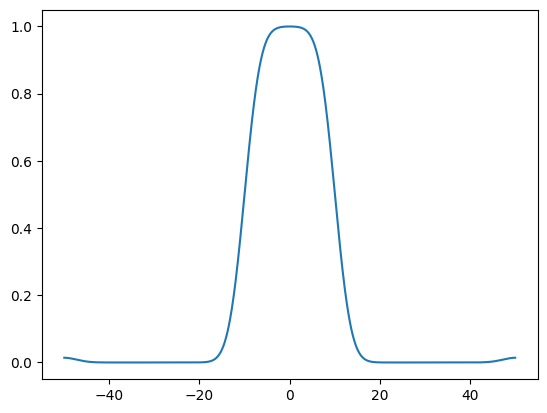

In [81]:
plt.plot(x[1:],u_plot[4])

In [83]:
Nx=19
Ny=19
xtotal  = np.linspace(0,1,Nx+2)
x=xtotal[1:Nx+1]
ytotal  = np.linspace(0,1,Ny+2)
y=ytotal[1:Ny+1]
dx = x[1] - x[0] 
dy=y[1] - y[0] 
xv, yv = np.meshgrid(x, y, indexing='ij')
X,Y=np.meshgrid(xtotal, ytotal, indexing='ij')
kappa_s=0.02*np.exp(-((((xv-0.7)**2)/0.09)+(((yv-0.6)**2)/0.25)))

In [97]:
u0=np.zeros_like(kappa_s)
u0[int((Nx/2 - Nx/10)/dx):int((Nx/2 + Nx/10)/dx),int((Ny/2 - Ny/10)/dy):int((Ny/2 + Ny/10)/dx)]=1
u0hat=np.fft.fft2(u0)
u0hat_ri=np.concatenate((u0hat.real,u0hat.imag))
dt=0.1
t=np.arange(0,10,dt)

In [100]:
def rhsHeat(uhat_ri,t,kappa,alpha):
    uhat=uhat_ri[:N]+(1j)+uhat_ri[N:]
    d_uhat=-alpha**2*(np.power(kappa,2))*uhat
    d_uhat_ri=np.concatenate((d_uhat.real,d_uhat.imag)).astype('float64')
    return d_uhat_ri

In [101]:
uhat_ri=odeint(rhsHeat,u0hat_ri,t,args=(kappa,alpha))
uhat=uhat_ri[:,:N]+(1j)+uhat_ri[:,N:]
u=np.zeros_like(uhat)
for k in range(len(t)):
    u[k,:]=np.fft.ifft(uhat[k,:])
u=u.real

ValueError: Initial condition y0 must be one-dimensional.